In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime

In [32]:
#read file
df = pd.read_csv('AI_K67_pythondata.csv', parse_dates = [1])
df.head()

,UserName,DateTime,FilesChange
0,khaidv123,2023-05-22 09:12:00,2
1,khaidv123,2023-05-22 09:09:36,1
2,khaidv123,2023-05-22 09:09:17,1
3,khaidv123,2023-05-22 09:06:47,1
4,khaidv123,2023-05-22 09:04:00,2


In [33]:
#clean the data
df = df.dropna(axis = 0)
df = df.dropna(axis = 1)
df

,UserName,DateTime,FilesChange
0,khaidv123,2023-05-22 09:12:00,2
1,khaidv123,2023-05-22 09:09:36,1
2,khaidv123,2023-05-22 09:09:17,1
3,khaidv123,2023-05-22 09:06:47,1
4,khaidv123,2023-05-22 09:04:00,2
...,...,...,...
1737,Hanhdz123,2023-04-24 10:48:02,13
1738,Hanhdz123,2023-04-21 08:41:05,1
1739,Hanhdz123,2023-04-21 08:40:53,5
1740,Hanhdz123,2023-04-21 08:21:35,8


In [34]:
#the total of commits 
df.shape[0]

1742

In [35]:
#the list of member and their commitions
df_new = pd.DataFrame(df['UserName'].value_counts())
df_new = df_new.reset_index()
df_new.columns = ['UserName', 'TotalCommitions']
df_new.head()

,UserName,TotalCommitions
0,truongchd,122
1,NinhDT22022522,71
2,Hanhdz123,68
3,manhbd-22022602,68
4,PhuTD1,67


In [36]:
#the number of member has commited 
df_new.shape[0]

33

In [37]:
#the maximum number of commitions
Max = df_new['TotalCommitions'].max()
Max

122

In [38]:
#the person who commit the max number of commitions
df_new[df_new['TotalCommitions'] == Max]

,UserName,TotalCommitions
0,truongchd,122


In [39]:
#the mminimum number of commitions
Min = df_new['TotalCommitions'].min()
Min

26

In [40]:
#the person who commit the max number of commitions
df_new[df_new['TotalCommitions'] == Min]

,UserName,TotalCommitions
32,quocanhuet,26


In [41]:
#the mean of committion per person 
Mean = df_new['TotalCommitions'].mean().round(1)
Mean

52.8

In [42]:
#the number of person who commited more than Mean
df_new[df_new['TotalCommitions'] > Mean].shape[0]

14

In [43]:
#the number of person who commited less than Mean
df_new[df_new['TotalCommitions'] < Mean].shape[0]

19

In [44]:
#create new columns namely Date
df['Date'] = df['DateTime'].dt.date
df.head()

,UserName,DateTime,FilesChange,Date
0,khaidv123,2023-05-22 09:12:00,2,2023-05-22
1,khaidv123,2023-05-22 09:09:36,1,2023-05-22
2,khaidv123,2023-05-22 09:09:17,1,2023-05-22
3,khaidv123,2023-05-22 09:06:47,1,2023-05-22
4,khaidv123,2023-05-22 09:04:00,2,2023-05-22


In [45]:
#show the commitions per day in dataframe
new_df = df['Date'].value_counts()
new_df

2023-04-28    414
2023-05-08    262
2023-05-12    208
2023-05-05    147
2023-05-22    109
2023-05-19    108
2023-04-21     83
2023-05-15     76
2023-05-14     67
2023-05-18     65
2023-04-24     46
2023-05-11     35
2023-04-17     33
2023-05-04     17
2023-05-07     14
2023-05-24      9
2023-05-16      8
2023-05-23      7
2023-05-09      7
2023-04-30      5
2023-04-29      4
2023-06-01      3
2023-05-26      3
2023-05-06      3
2023-05-03      2
2023-05-21      2
2023-05-25      1
2023-04-25      1
2023-05-01      1
2023-05-28      1
2023-05-02      1
Name: Date, dtype: int64

In [46]:
#the maximum number of commitions
Max = df['Date'].value_counts().max()
Max

414

In [47]:
#the days have the maximum number of commitions
for date in new_df.index: 
    if new_df[date] == Max: 
        print(date)

2023-04-28


In [48]:
#the minimum number of commitions
Min = df['Date'].value_counts().min()
Min

1

In [49]:
#the days have the minimum number of commitions
for date in new_df.index: 
    if new_df[date] == Min: 
        print(date)

2023-05-25
2023-04-25
2023-05-01
2023-05-28
2023-05-02


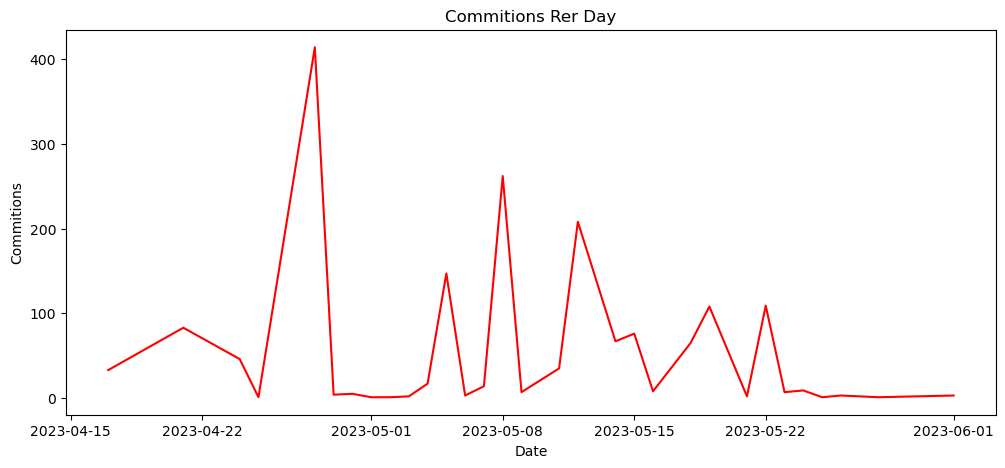

In [50]:
#the line chart show the tranformation of the number of commitions per day 
fig = plt.figure(figsize = (12, 5))
df['Date'].value_counts().plot(kind = 'line', color = 'red', figsize = (12, 5))
plt.xlabel('Date')
plt.ylabel('Commitions')
plt.title('Commitions Rer Day')
fig.savefig('commitions_per_day.png')
plt.show()

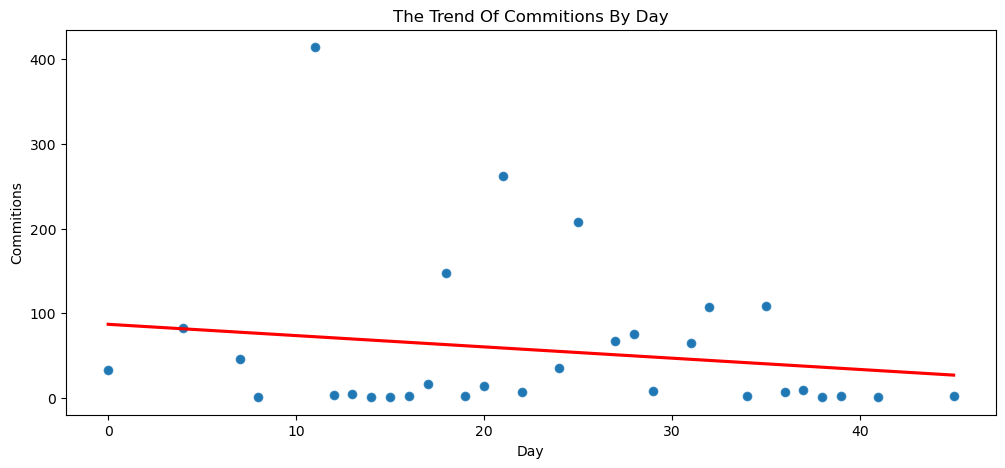

In [51]:
#create a scatter chart to perform the tranformation of commitions by day 
#draw a regression line to show the trend of scatter chart 
count = df['Date'].value_counts()
indexs = df['Date'].value_counts().index
value = []; 
for index in indexs: 
    value.append(count[index])
num_day = []
first_day = df['Date'].min()
for index in indexs: 
    num_day.append((index - first_day).total_seconds()/(3600*24))
data = pd.DataFrame({'Num_day' : num_day, 'Value' : value})
fig = plt.figure(figsize = (12, 5))
sns.scatterplot(data = data, x = 'Num_day', y = 'Value')
sns.regplot(data = data, x = 'Num_day', y = 'Value', ci=None, line_kws={'color': 'red'})
plt.xlabel('Day')
plt.ylabel('Commitions')
plt.title('The Trend Of Commitions By Day')
plt.show()
fig.savefig('theTrendofcommitionsByDay.png')

In [52]:
df['Date'] = pd.to_datetime(df['Date'])
df['WeekDay'] = df['Date'].dt.day_name()
df

,UserName,DateTime,FilesChange,Date,WeekDay
0,khaidv123,2023-05-22 09:12:00,2,2023-05-22,Monday
1,khaidv123,2023-05-22 09:09:36,1,2023-05-22,Monday
2,khaidv123,2023-05-22 09:09:17,1,2023-05-22,Monday
3,khaidv123,2023-05-22 09:06:47,1,2023-05-22,Monday
4,khaidv123,2023-05-22 09:04:00,2,2023-05-22,Monday
...,...,...,...,...,...
1737,Hanhdz123,2023-04-24 10:48:02,13,2023-04-24,Monday
1738,Hanhdz123,2023-04-21 08:41:05,1,2023-04-21,Friday
1739,Hanhdz123,2023-04-21 08:40:53,5,2023-04-21,Friday
1740,Hanhdz123,2023-04-21 08:21:35,8,2023-04-21,Friday


In [53]:
new_df = df 
new_df['WeekDay'] = new_df['Date'].dt.weekday
new_df = new_df.sort_values(by = 'WeekDay')
new_df['WeekDay'] = new_df['Date'].dt.day_name()
new_df = new_df.groupby(by = 'WeekDay', sort = False).FilesChange.sum()
new_df = new_df.reset_index()
new_df 

,WeekDay,FilesChange
0,Monday,2768
1,Tuesday,108
2,Wednesday,17
3,Thursday,937
4,Friday,3623
5,Saturday,17
6,Sunday,424


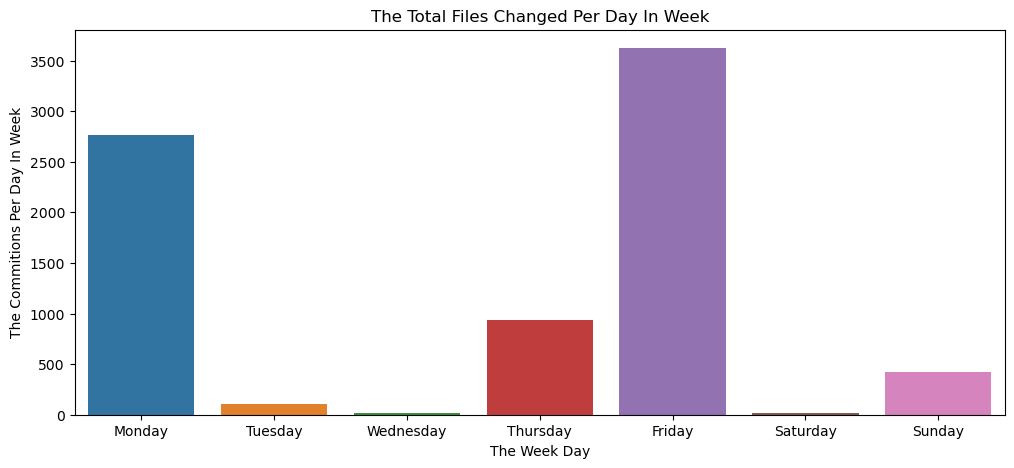

In [54]:
fig = plt.figure(figsize = (12, 5))
sns.barplot(data = new_df, x = 'WeekDay', y = 'FilesChange')
plt.xlabel('The Week Day') 
plt.ylabel('The Commitions Per Day In Week')
plt.title('The Total Files Changed Per Day In Week')
plt.show()
fig.savefig('theTotalcommitionsPerDayinWeek.png')

In [55]:
new_df = df
new_df.head()
new_df['Week'] = new_df['DateTime'].dt.week
new_df

C:\Users\HOANG ANH PC\AppData\Local\Temp\ipykernel_11456\2713758068.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  new_df['Week'] = new_df['DateTime'].dt.week


,UserName,DateTime,FilesChange,Date,WeekDay,Week
0,khaidv123,2023-05-22 09:12:00,2,2023-05-22,0,21
1,khaidv123,2023-05-22 09:09:36,1,2023-05-22,0,21
2,khaidv123,2023-05-22 09:09:17,1,2023-05-22,0,21
3,khaidv123,2023-05-22 09:06:47,1,2023-05-22,0,21
4,khaidv123,2023-05-22 09:04:00,2,2023-05-22,0,21
...,...,...,...,...,...,...
1737,Hanhdz123,2023-04-24 10:48:02,13,2023-04-24,0,17
1738,Hanhdz123,2023-04-21 08:41:05,1,2023-04-21,4,16
1739,Hanhdz123,2023-04-21 08:40:53,5,2023-04-21,4,16
1740,Hanhdz123,2023-04-21 08:21:35,8,2023-04-21,4,16


In [56]:
df_1 = new_df.groupby(by = ['Week', 'WeekDay']).FilesChange.sum()
df_1

Week  WeekDay
16    0           594
      4           446
17    0           544
      1             1
      4           907
      5            14
      6            18
18    0             4
      1             4
      2             5
      3            22
      4           565
      5             3
      6            69
19    0          1021
      1            10
      3           319
      4           913
      6           330
20    0           424
      1            44
      3           579
      4           777
      6             3
21    0           181
      1            49
      2            12
      3             1
      4            15
      6             4
22    3            16
Name: FilesChange, dtype: int64

In [57]:
df_1 = df_1.reset_index()
df_1 = df_1.sort_values(by = 'WeekDay')
df_1

,Week,WeekDay,FilesChange
0,16,0,594
2,17,0,544
24,21,0,181
19,20,0,424
14,19,0,1021
7,18,0,4
25,21,1,49
20,20,1,44
15,19,1,10
3,17,1,1


In [58]:
day_name = {
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday', 
    5: 'Saturday', 
    6: 'Sunday'
}
df_1['WeekDay'] = df_1['WeekDay'].apply(lambda w : day_name[w])

In [59]:
df_1 

,Week,WeekDay,FilesChange
0,16,Monday,594
2,17,Monday,544
24,21,Monday,181
19,20,Monday,424
14,19,Monday,1021
7,18,Monday,4
25,21,Tuesday,49
20,20,Tuesday,44
15,19,Tuesday,10
3,17,Tuesday,1


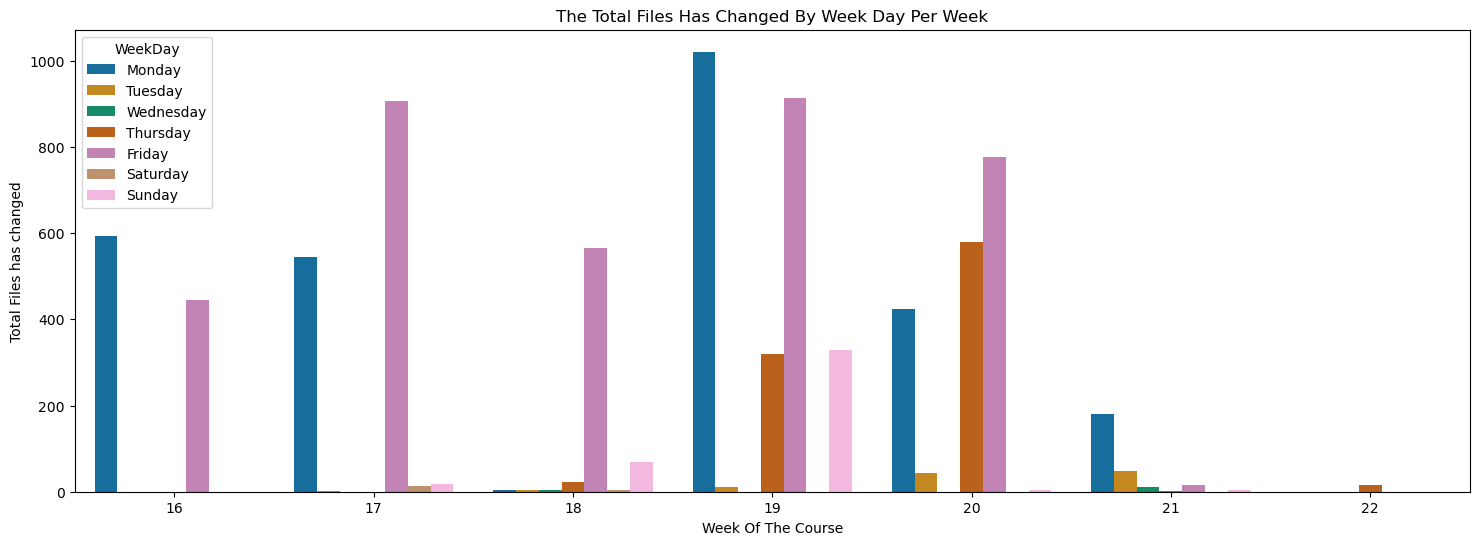

In [60]:
fig = plt.figure(figsize = (18, 6))
sns.barplot(df_1, x = 'Week', y = 'FilesChange', hue = 'WeekDay', palette = 'colorblind')
plt.xlabel('Week Of The Course')
plt.ylabel('Total Files has changed')
plt.title('The Total Files Has Changed By Week Day Per Week')
fig.savefig('thetotalfileshaschangedbyweekdayperweek.png')